[Quandle for sample data used in this practice](https://www.quandl.com/)

In [1]:
import numpy as np
import pandas as pd
import math
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression

In [ ]:
#Import sample dataset containing date, year, day of the week, day of the montn, holydays and sales (i.e. #loans sold)
df = pd.read_csv("C:\\Users\\Conure\\Desktop\\googlstock.csv",index_col='Date')

In [ ]:
df.head()

In [ ]:
df = df [['Open','High','Low','Close','Volume']]
df.head()

In [ ]:
#
df['HL_PCT'] = (df['High'] - df['Close']) / df['Close'] * 100.0
df['PCT_change'] = (df['Close']- df['Open']) / df['Open'] * 100.0

In [ ]:
df.head()

In [ ]:
df = df[['Close','HL_PCT','PCT_change','Volume']]
df.head()

### Which column should use as Label or should it be all used as feature???

### In this problem we are predicting Close prize after five days and we are going to generate from the same data

In [ ]:
# forcast price calculations

# define variable
forecast_col = 'Close'

# fill nan value with -99999
df.fillna(-99999, inplace=True)
df.head()

In [ ]:
#shifting the values for previuos four days 
forecast_out = int(math.ceil(0.05*len(df)))
forecast_out

In [ ]:
df['label'] = df[forecast_col].shift(forecast_out)

In [ ]:
df.dropna(inplace=True)
df.head(15)

In [ ]:
X = np.array(df.drop(['label'],1))
y = np.array(df['label'])

In [ ]:
X = preprocessing.scale(X)

In [ ]:
print(len(X),len(y))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(len(X_train),len(X_test),len(y_train),len(y_test))

In [ ]:
clf = LinearRegression()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test,y_test)

print(accuracy)

In [ ]:
clf = LinearRegression(n_jobs=5)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test,y_test)

print(accuracy)

In [ ]:
clf = svm.SVR()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test,y_test)

print(accuracy)

In [ ]:
clf = svm.SVR(kernel='poly')
clf.fit(X_train, y_train)

accuracy = clf.score(X_test,y_test)

print(accuracy)

In [ ]:
clf.predict()

# pickle  saving the model

In [ ]:
# Write File with pickle

with open('linearregression.pickle','wb') as f:
    pickle.dump(clf,f)

In [ ]:
# Open Save model with Pickle

pickle_in = open ('linearregression.pickle','rb')
clf=pickle.load(pickle_in)

# Liner Regression/ How its works

### Straight Line realation between data point (continues data)

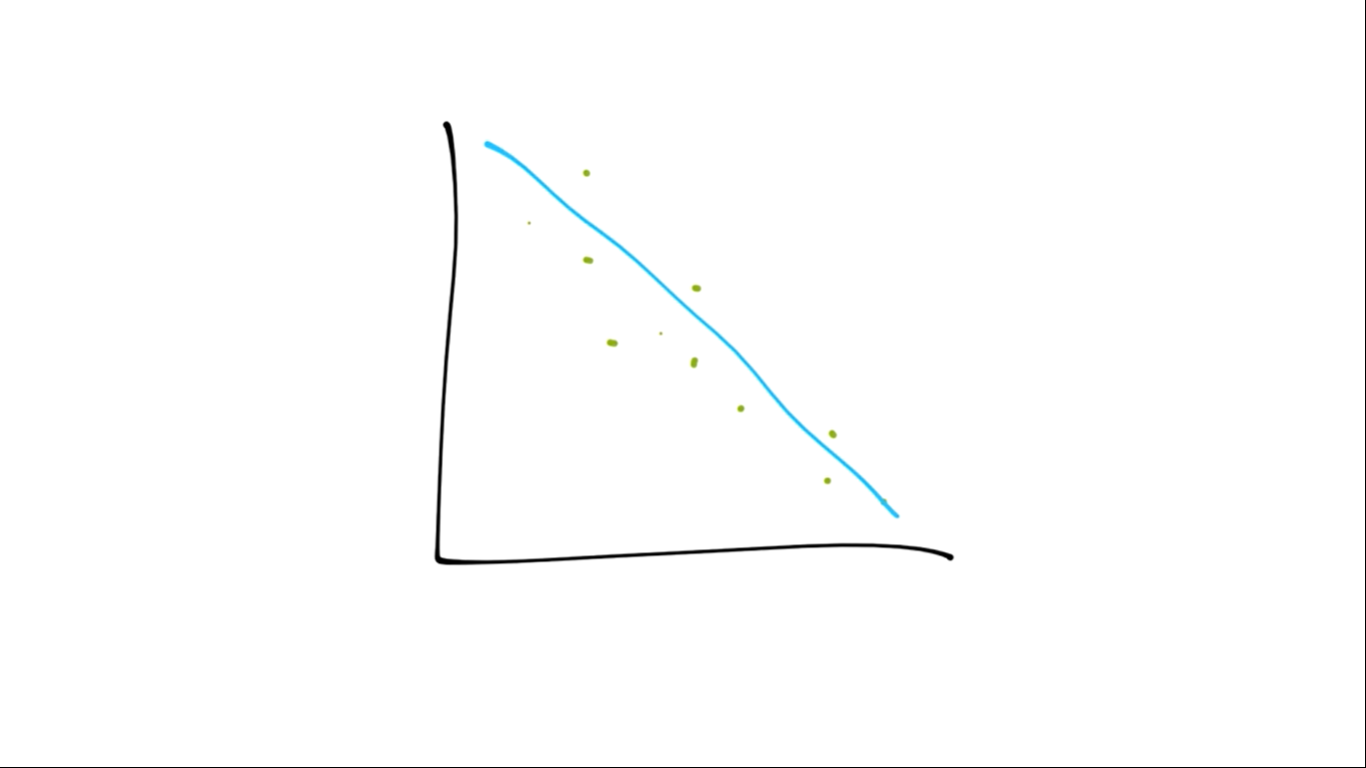

### There is no liner realation between data point and Liner regression only work or Liner data as define above.

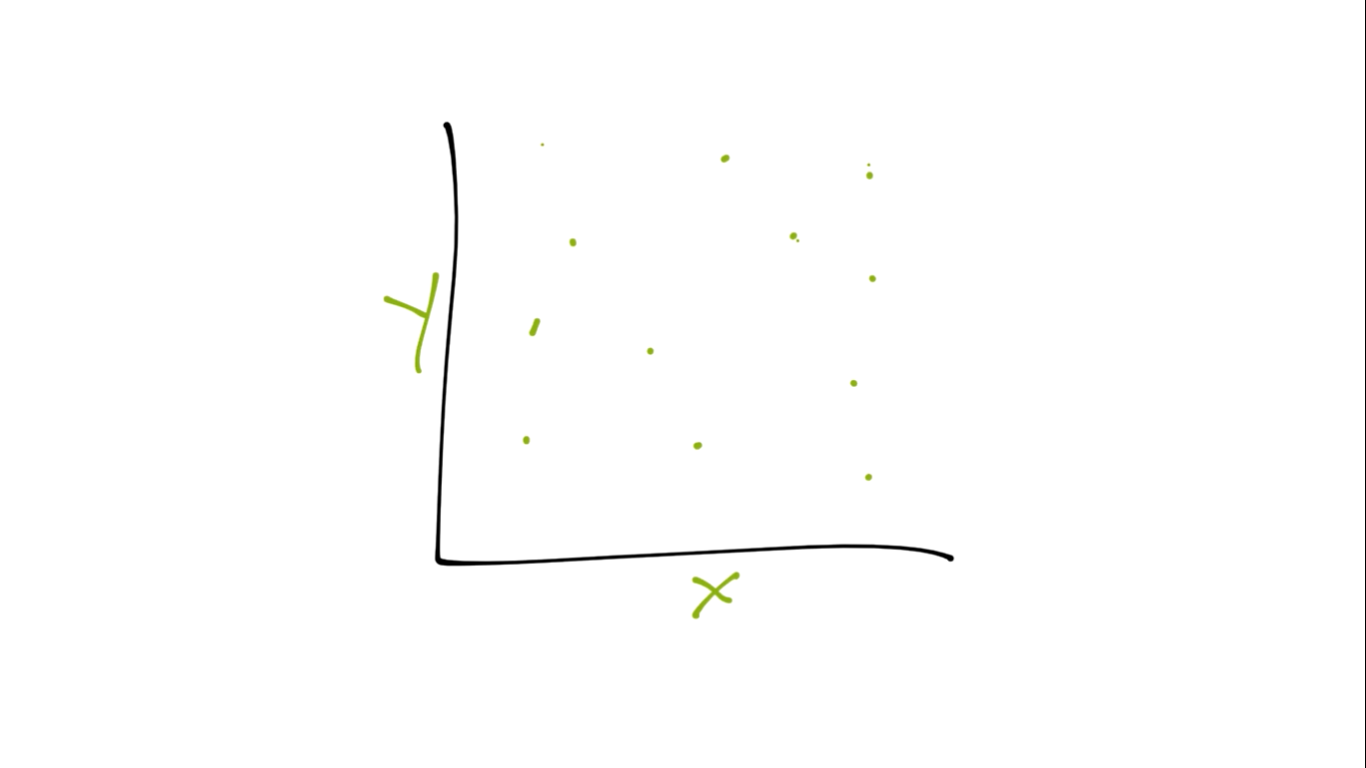

### The best fit line try to pass most data point or near to most data point. The formula of Straight Line is

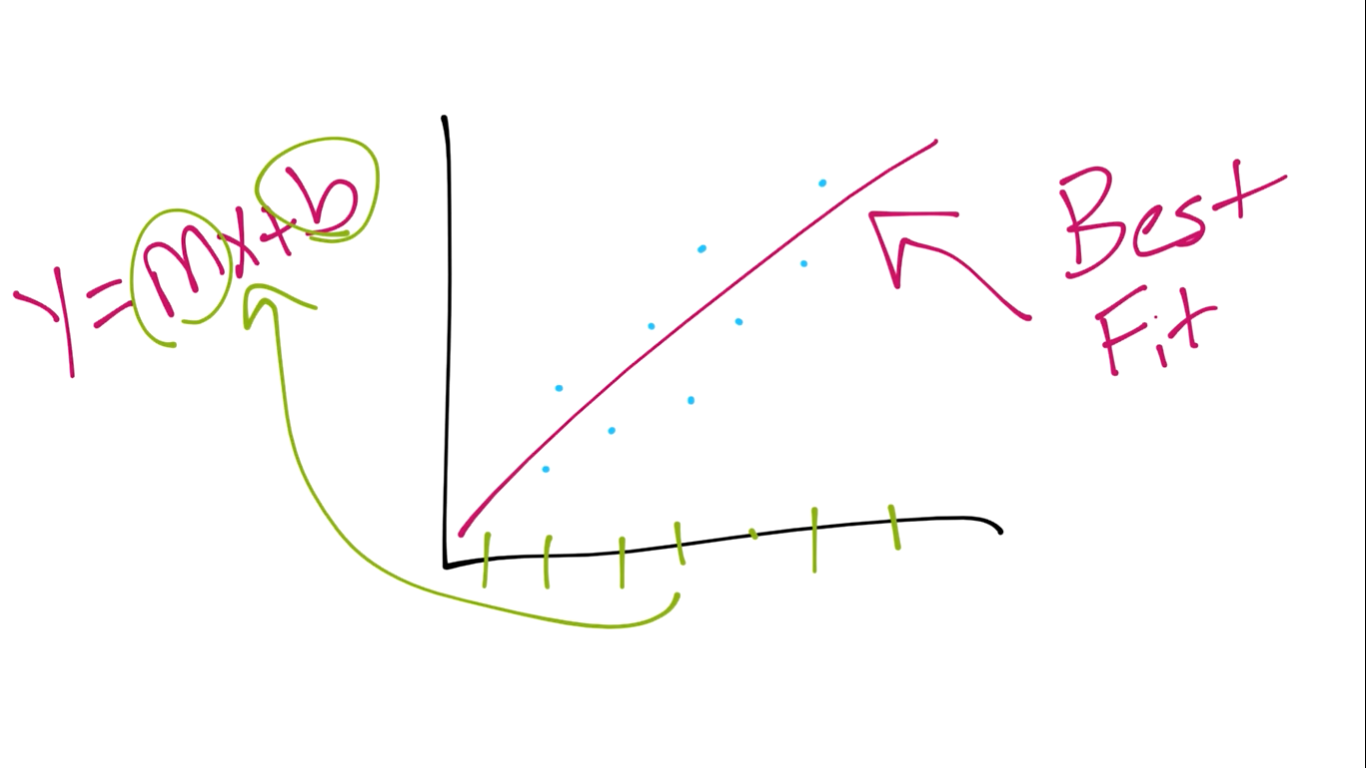

### when we pass the value of X we get the y, as X are provided in data we need to calculate (m,b). m mean 'Slope' and y mean y-intercept

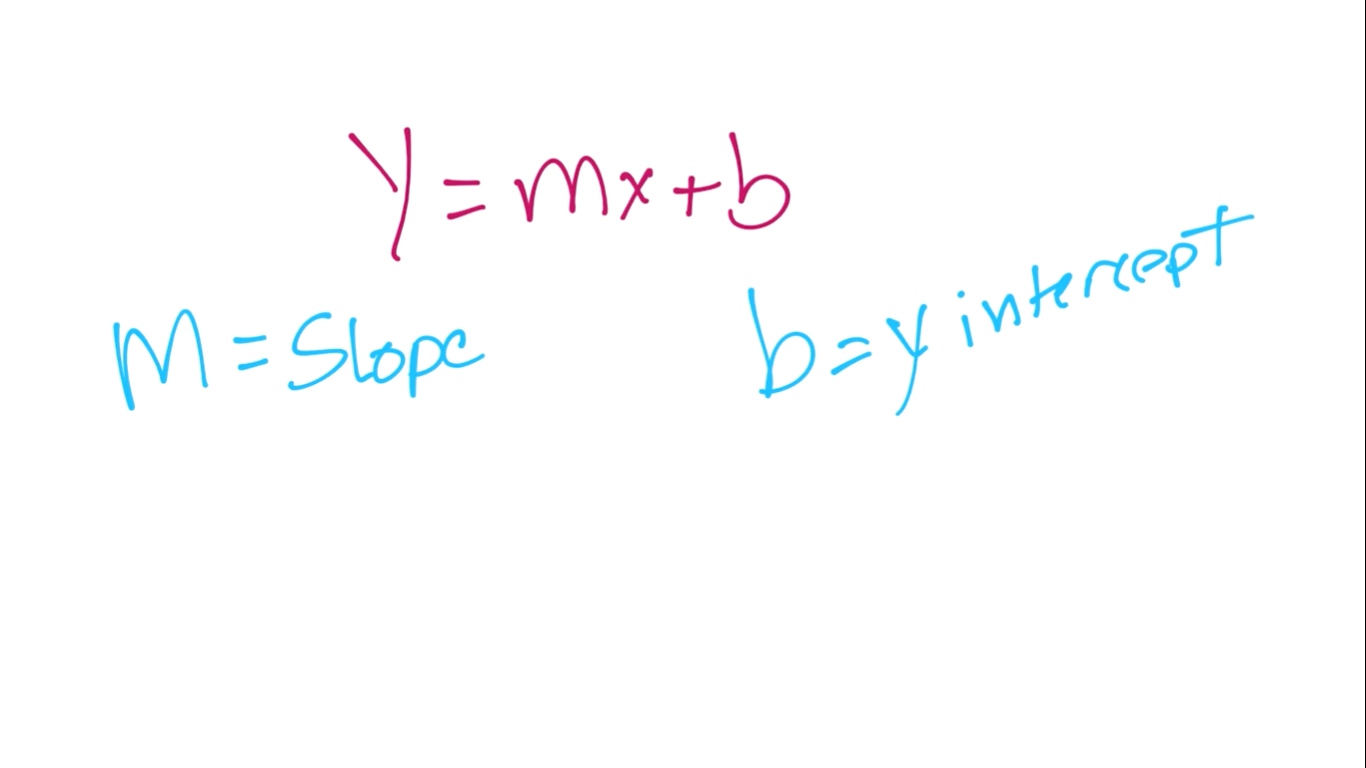

### formula for m and y intercept 

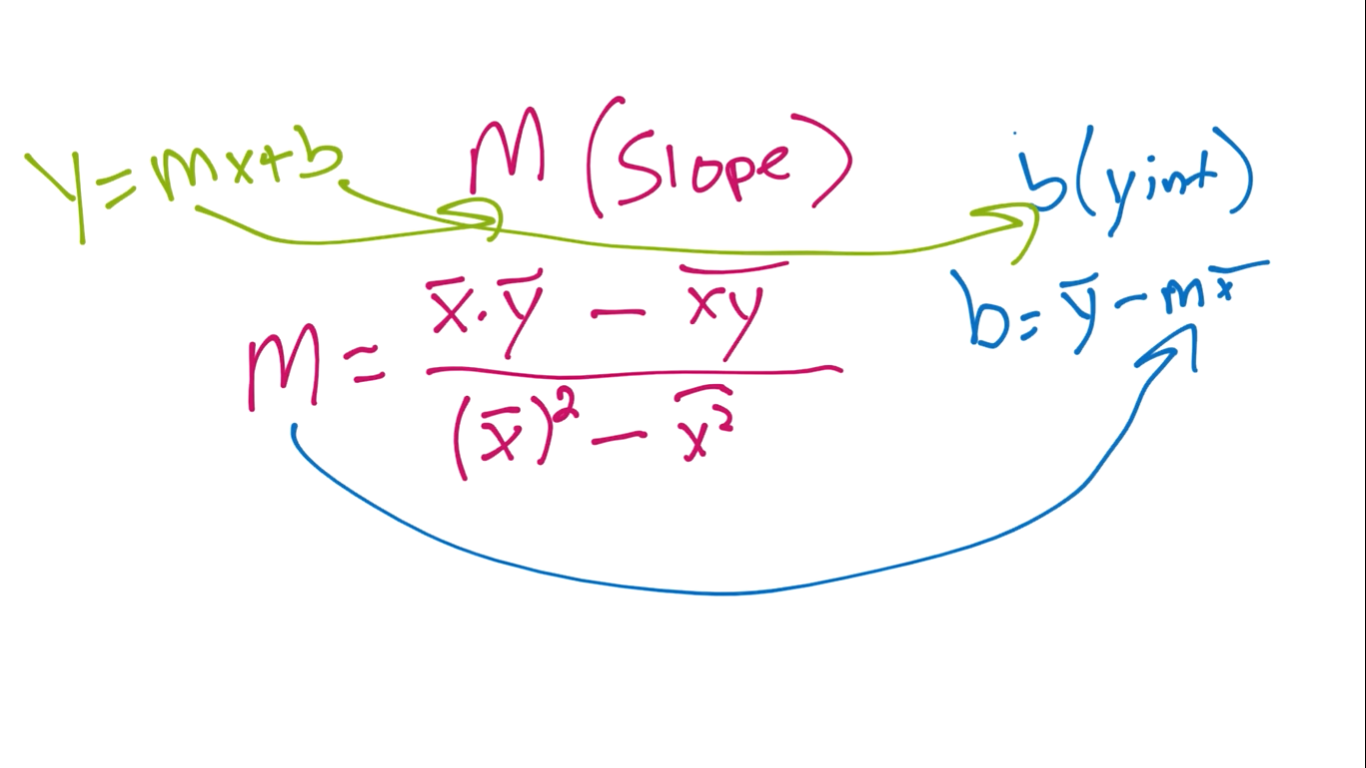

# Implementation of linear Regression Formula in Python

In [2]:
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

In [ ]:
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

In [3]:
def best_fit_slope_and_intercept(xs,ys):
    
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys))/
           ((mean(xs)**2) - mean(xs**2)) )
    
    b = mean(ys) - (m * mean(xs))
    return m,b

In [18]:
m,b = best_fit_slope_and_intercept(xs,ys)
print(m,b)

2.051876172607879 0.6134146341463591


In [19]:
regression_line = [(m*x)+b for x in xs]

predict_x = 8
predict_y = (m*predict_x)+b

print(predict_y)

17.028424015009392


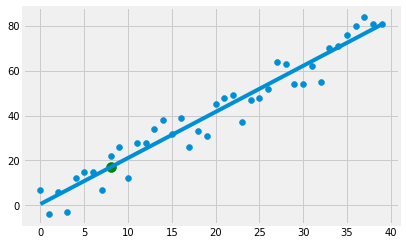

In [20]:
plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y,s=100, color='g')
plt.plot(xs,regression_line)
plt.show()

### As we draw our best fit line(slope) but its may not be the good fit line. we have to check is it is good fit line.

### by doing  mean squared error( e^2) and coefficient of determination(r^2) 

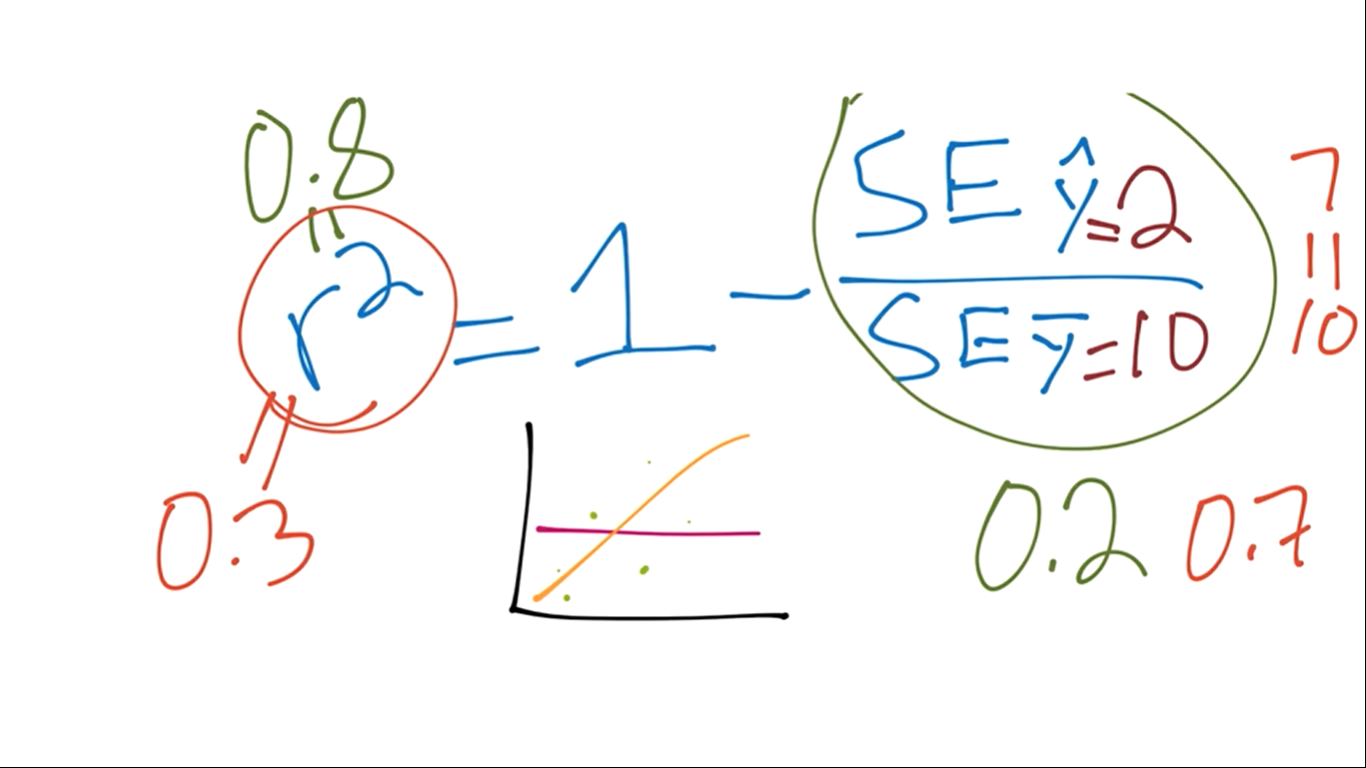

In [11]:
def squared_error(ys_orig,ys_line):
    
    return sum((ys_line - ys_orig)**2 )

In [12]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig,ys_line)
    squared_error_y_mean = squared_error(ys_orig,y_mean_line)
    
    #print(y_mean_line,squared_error_regr,squared_error_y_mean)
    
    return 1 - (squared_error_regr / squared_error_y_mean)



In [21]:
r_squared = coefficient_of_determination(ys,regression_line)
print('coefficient_of_determination =', r_squared)

coefficient_of_determination = 0.9406040589849504


# Testing Assumptions

In [4]:
import random

In [5]:
def create_dataset(hm,variance,step=2, correlation=False):
    val=1
    ys=[]
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39.] [-4. 12.  8. 16.  8.  9.  8. 14. 22. 27. 15. 13. 24. 27. 21. 40. 23. 36.
 36. 34. 50. 42. 42. 38. 48. 50. 46. 49. 60. 51. 51. 61. 68. 57. 61. 77.
 74. 82. 82. 81.]
coefficient_of_determination = 0.9356899660527436


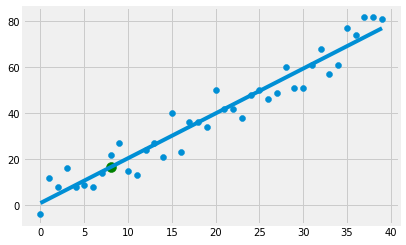

In [24]:
# here we test our r_square  with own generated data as we passing low variance like= 10  
# or change to higher value like 80 and you can see the result

#xs, ys = create_dataset(40,80,2,correlation='pos')
xs, ys = create_dataset(40,10,2,correlation='pos')

#or we can chnage corelation to False to generate non-liner data
#xs, ys = create_dataset(40,10,2,correlation=False)

print(xs,ys)

m,b = best_fit_slope_and_intercept(xs,ys)

regression_line = [(m*x)+b for x in xs]

predict_x = 8
predict_y = (m*predict_x)+b



r_squared = coefficient_of_determination(ys,regression_line)
print('coefficient_of_determination =', r_squared)



plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y,s=100, color='g')
plt.plot(xs,regression_line)
plt.show()